The file brfss.csv contains a subset of the responses and variables from the [2019 Behavioral Risk Factor Surveillance System (BRFSS)](https://www.cdc.gov/brfss/). This dataset can be downloaded using this link: [https://drive.google.com/file/d/1acJKmT2aFf2nZl_VYLE897yx0LPNajoY/view?usp=sharing](https://drive.google.com/file/d/1acJKmT2aFf2nZl_VYLE897yx0LPNajoY/view?usp=sharing).

A detailed Codebook can be found [here](https://www.cdc.gov/brfss/annual_data/2019/pdf/codebook19_llcp-v2-508.HTML).

Our target variable is the CHECKUP1 column, which contains the responses to the question "About how long has it been since you last visited a doctor for a routine checkup?   [A routine checkup is a general physical exam, not an exam for a specific injury, illness, or condition.]" Specifically, we want to try and predict if someone gives an answer besides "Within past year (anytime less than 12 months ago)".

First, create a new coumn, "target" by converting this to a binary outcome. After you do this, drop the CHECKUP1 column from your dataframe so that you don't accidentally make predictions based off of it.

Then, experiment with making a logistic regression model to predict the target variable using one or more of the other columns. Note that you will need to convert the precictor columns into dummy variable prior to fitting a model. What do you find?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [3]:
brfss = pd.read_csv('../data/brfss.csv')

In [4]:
brfss.head()

,GENHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,_RFHYPE5,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD2,ADDEPEV3,CHCKDNY2,DIABETE4,HAVARTH4,MARITAL,EDUCA,RENTHOM1,VETERAN3,EMPLOY1,INCOME2,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,EXERANY2,_METSTAT,_URBSTAT,_IMPRACE,_RFBMI5,_RFSMOK3,_RFBING5,_RFDRHV7,_TOTINDA,target
0,Good,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,Yes,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Divorced,Grades 9 through 11 (Some high school),Rent,No,Retired,"Less than $20,000 ($15,000 to less than $20,000)",No,No,No,Yes,No,No,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,No physical activity or exercise in last 30 days,True
1,Fair,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Married,College 1 year to 3 years (Some college or tec...,Own,No,Retired,"Less than $35,000 ($25,000 to less than $35,000)",No,Yes,No,No,No,No,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,Had physical activity or exercise,True
2,Good,Yes,More than one,No,Within past year (anytime less than 12 months ...,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Widowed,College 4 years or more (College graduate),Own,No,Retired,"Less than $75,000 ($50,000 to less than $75,000)",No,No,No,Yes,No,No,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,Had physical activity or exercise,True
3,Very good,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,No,No,No,No,Yes,No,No,Yes,No,No,Yes,Yes,Divorced,College 4 years or more (College graduate),Own,No,Retired,"Less than $75,000 ($50,000 to less than $75,000)",No,No,No,Yes,No,Yes,Yes,"Nonmetropolitan counties (_URBNRRL = 5,6)",Rural counties (_URBNRRL = 6),"White, Non-Hispanic",Yes,Yes,No,No,Had physical activity or exercise,True
4,Poor,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,Yes,No,No,No,Yes,No,No,Yes,No,No,Yes,Yes,Widowed,Grades 1 through 8 (Elementary),Own,No,Unable to work,"Less than $20,000 ($15,000 to less than $20,000)",No,No,No,Yes,No,No,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,No physical activity or exercise in last 30 days,True


In [5]:
brfss['CHECKUP1'].unique()

array(['Within past year (anytime less than 12 months ago)',
       'Within past 2 years (1 year but less than 2 years ago)',
       '5 or more years ago',
       'Within past 5 years (2 years but less than 5 years ago)', 'Never'],
      dtype=object)

In [6]:
brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262049 entries, 0 to 262048
Data columns (total 40 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   GENHLTH   262049 non-null  object
 1   HLTHPLN1  262049 non-null  object
 2   PERSDOC2  262049 non-null  object
 3   MEDCOST   262049 non-null  object
 4   CHECKUP1  262049 non-null  object
 5   _RFHYPE5  262049 non-null  object
 6   TOLDHI2   262049 non-null  object
 7   CVDINFR4  262049 non-null  object
 8   CVDCRHD4  262049 non-null  object
 9   CVDSTRK3  262049 non-null  object
 10  ASTHMA3   262049 non-null  object
 11  CHCSCNCR  262049 non-null  object
 12  CHCOCNCR  262049 non-null  object
 13  CHCCOPD2  262049 non-null  object
 14  ADDEPEV3  262049 non-null  object
 15  CHCKDNY2  262049 non-null  object
 16  DIABETE4  262049 non-null  object
 17  HAVARTH4  262049 non-null  object
 18  MARITAL   262049 non-null  object
 19  EDUCA     262049 non-null  object
 20  RENTHOM1  262049 non-null 

In [7]:
checkup_to_binary = {'Within past year (anytime less than 12 months ago)' : 1,
                     'Within past 2 years (1 year but less than 2 years ago)' :0,
                     '5 or more years ago' : 0,
                     'Within past 5 years (2 years but less than 5 years ago)' : 0,
                     'Never' :0
                     
                    }

In [8]:
brfss['Target'] = [checkup_to_binary[key] for key in brfss['CHECKUP1']]

In [9]:
brfss.head()

,GENHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,_RFHYPE5,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD2,ADDEPEV3,CHCKDNY2,DIABETE4,HAVARTH4,MARITAL,EDUCA,RENTHOM1,VETERAN3,EMPLOY1,INCOME2,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,EXERANY2,_METSTAT,_URBSTAT,_IMPRACE,_RFBMI5,_RFSMOK3,_RFBING5,_RFDRHV7,_TOTINDA,target,Target
0,Good,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,Yes,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Divorced,Grades 9 through 11 (Some high school),Rent,No,Retired,"Less than $20,000 ($15,000 to less than $20,000)",No,No,No,Yes,No,No,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,No physical activity or exercise in last 30 days,True,1
1,Fair,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Married,College 1 year to 3 years (Some college or tec...,Own,No,Retired,"Less than $35,000 ($25,000 to less than $35,000)",No,Yes,No,No,No,No,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,Had physical activity or exercise,True,1
2,Good,Yes,More than one,No,Within past year (anytime less than 12 months ...,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Widowed,College 4 years or more (College graduate),Own,No,Retired,"Less than $75,000 ($50,000 to less than $75,000)",No,No,No,Yes,No,No,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,Had physical activity or exercise,True,1
3,Very good,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,No,No,No,No,Yes,No,No,Yes,No,No,Yes,Yes,Divorced,College 4 years or more (College graduate),Own,No,Retired,"Less than $75,000 ($50,000 to less than $75,000)",No,No,No,Yes,No,Yes,Yes,"Nonmetropolitan counties (_URBNRRL = 5,6)",Rural counties (_URBNRRL = 6),"White, Non-Hispanic",Yes,Yes,No,No,Had physical activity or exercise,True,1
4,Poor,Yes,"Yes, only one",No,Within past year (anytime less than 12 months ...,No,Yes,No,No,No,Yes,No,No,Yes,No,No,Yes,Yes,Widowed,Grades 1 through 8 (Elementary),Own,No,Unable to work,"Less than $20,000 ($15,000 to less than $20,000)",No,No,No,Yes,No,No,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,No physical activity or exercise in last 30 days,True,1


In [10]:
brfss.drop(columns = 'CHECKUP1', inplace = True)

In [11]:
brfss.head()

,GENHLTH,HLTHPLN1,PERSDOC2,MEDCOST,_RFHYPE5,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD2,ADDEPEV3,CHCKDNY2,DIABETE4,HAVARTH4,MARITAL,EDUCA,RENTHOM1,VETERAN3,EMPLOY1,INCOME2,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,EXERANY2,_METSTAT,_URBSTAT,_IMPRACE,_RFBMI5,_RFSMOK3,_RFBING5,_RFDRHV7,_TOTINDA,target,Target
0,Good,Yes,"Yes, only one",No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Divorced,Grades 9 through 11 (Some high school),Rent,No,Retired,"Less than $20,000 ($15,000 to less than $20,000)",No,No,No,Yes,No,No,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,No physical activity or exercise in last 30 days,True,1
1,Fair,Yes,"Yes, only one",No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Married,College 1 year to 3 years (Some college or tec...,Own,No,Retired,"Less than $35,000 ($25,000 to less than $35,000)",No,Yes,No,No,No,No,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,Had physical activity or exercise,True,1
2,Good,Yes,More than one,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Widowed,College 4 years or more (College graduate),Own,No,Retired,"Less than $75,000 ($50,000 to less than $75,000)",No,No,No,Yes,No,No,Yes,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","Black, Non-Hispanic",Yes,No,No,No,Had physical activity or exercise,True,1
3,Very good,Yes,"Yes, only one",No,No,No,No,No,No,Yes,No,No,Yes,No,No,Yes,Yes,Divorced,College 4 years or more (College graduate),Own,No,Retired,"Less than $75,000 ($50,000 to less than $75,000)",No,No,No,Yes,No,Yes,Yes,"Nonmetropolitan counties (_URBNRRL = 5,6)",Rural counties (_URBNRRL = 6),"White, Non-Hispanic",Yes,Yes,No,No,Had physical activity or exercise,True,1
4,Poor,Yes,"Yes, only one",No,No,Yes,No,No,No,Yes,No,No,Yes,No,No,Yes,Yes,Widowed,Grades 1 through 8 (Elementary),Own,No,Unable to work,"Less than $20,000 ($15,000 to less than $20,000)",No,No,No,Yes,No,No,No,"Metropolitan counties (_URBNRRL = 1,2,3,4)","Urban counties (_URBNRRL = 1,2,3,4,5)","White, Non-Hispanic",No,No,No,No,No physical activity or exercise in last 30 days,True,1


In [12]:
brfss['GENHLTH'].unique()

array(['Good', 'Fair', 'Very good', 'Poor', 'Excellent'], dtype=object)

In [23]:
brfss['GENHLTH'] = brfss['GENHLTH'].map({'Good':1, 'Fair' : 2, 'Very good': 3, 'Poor' : 4, 'Excellent': 5})

In [24]:
X = brfss[['GENHLTH']]                 # Predictor variable (as a DataFrame)
y = brfss['Target']   

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,     # Keep the same proportions of the target in the training and test data. Important especially if you don't have equal representation in the dataset.
                                                    test_size = 0.25,
                                                    random_state = 52) #lets you reproducibly randomize the data into the subsets.

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logreg = LogisticRegression()       
logreg.fit(X_train, y_train)    

LogisticRegression()

In [29]:
logreg.intercept_

array([1.79668142])

In [30]:
logreg.coef_

array([[-0.09501825]])

In [31]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [32]:
logreg.predict_proba(X_test)

array([[0.18069784, 0.81930216],
       [0.18069784, 0.81930216],
       [0.15424817, 0.84575183],
       ...,
       [0.15424817, 0.84575183],
       [0.18069784, 0.81930216],
       [0.18069784, 0.81930216]])

In [34]:
i = 33 #these correspond to individual patients. can adjust this number to see more results

print('Predicted Information:\n{}'.format(X_test.iloc[i])) #empty braces filled with whatever is in parentheses
print('---------------------------------')
print('Predicted Probability going to the doctor in the past year: {}'.format(y_pred_prob[i]))
print('Actual: {}'.format(y_test.iloc[i])) #see how close we are by looking at the actual values

Predicted Information:
GENHLTH    1
Name: 161797, dtype: int64
---------------------------------
Predicted Probability going to the doctor in the past year: 0.8457518303580973
Actual: 0


In [35]:
from sklearn.metrics import roc_auc_score, roc_curve

In [37]:
print(y_test)

213569    1
81125     1
101803    1
127032    0
193281    0
         ..
81697     1
124952    1
19976     0
60493     0
124533    1
Name: Target, Length: 65513, dtype: int64


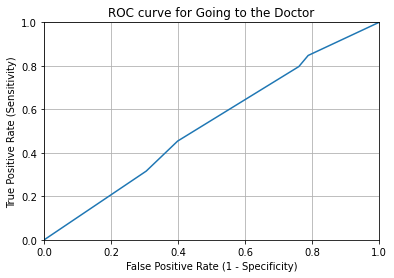

In [38]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Going to the Doctor')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)